In [1]:
! cd /home/ec2-user/SageMaker/models/research/ && python -m pip install --use-deprecated=legacy-resolver . 

Processing /home/ec2-user/SageMaker/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached avro-python3-1.10.2.tar.gz (38 kB)
  Using cached apache_beam-2.33.0-cp36-cp36m-manylinux2010_x86_64.whl (9.8 MB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached pycocotools-2.0.2.tar.gz (23 kB)
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached tf_models_official-2.6.0-py2.py3-none-any.whl (1.8 MB)
  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
  Using cached pyarrow-4.0.1-cp36-cp36m-manylinux2014_x86_64.whl (21.9 MB)
  Using cached crcmod-1.7.tar.gz (89 kB)
  Using cached dill-0.3

  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
     |████████████████████████████████| 115 kB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 154 kB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 5.6 MB 48.9 MB/s eta 0:00:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 462 kB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 40.5 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 69.9 MB/s eta 0:00:01
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
     |████████████████████████████████| 78 kB 10.6 MB/s eta 0:00:01
  Using cached t

  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1668658 sha256=2f7f1a02cfb1b1967fd4c0d3bee2c2ad462b32bcbf7321e06acbf10b18ae631c
  Stored in directory: /tmp/pip-ephem-wheel-cache-71kz1wch/wheels/0f/f9/3c/80b1718c9d2eb5b6a4cae1495bfab9871f89c411c41b586424
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44009 sha256=2ff00e69d7cbeb287f43cc77ad4ae87494f780c42847c0044a2ddec89aed44ec
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5b/6f/ca/80164a844e4691238e34a8b139b4695354df4490db91be61f7
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp36-cp36m-linux_x86_64.whl size=103251 sha256=54efe6fd344b215f9b6dc1326056f2823a5f032b1d0ed830f30e62755a8d99bd
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d8/c2/ba/8f5306f921c2e79ad7b09effdfed6bd966cfcf8c6fe55422d6
  Created wheel for crcmod: filename=crcmod-1.7-cp36-cp36m-linux_x86_64.whl size=23564 sha256=db84ab594a788822b90680b72168246d4f55fb01687

In [2]:
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util, config_util
from object_detection.builders import model_builder

In [3]:
from PIL import Image
import tensorflow as tf
import numpy as np
from io import BytesIO
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
MODEL_PATH = "tflite/model_640.tflite"
MODEL_PATH = "tflite/object_detection_mobile_object_localizer_v1_1_default_1.tflite"
MODEL_PATH = "tflite/mobilenet_2_quant_detect.tflite"
MODEL_PATH = "tflite/model_320_nofpn.tflite"
MODEL_PATH = "tflite/avocado_trucks_mobilenet_640.tflite"
MODEL_PATH = "tflite/optdef_avocado_trucks_mobilenet_640.tflite"
# MODEL_PATH = "tflite/original_fpnlite_640.tflite"

In [28]:
input_width = 0
input_height = 0

def get_interpreter():
    interpreter = tf.lite.Interpreter(MODEL_PATH)
    interpreter.allocate_tensors()
    _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']
    return interpreter

interpreter = get_interpreter()
_, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']
input_height, input_width

(640, 640)

In [29]:
def image_file_to_tensor(path):
    cv_img = cv2.imread(path,1).astype('uint8')
    cv_img = cv2.resize(cv_img, (input_height, input_width))
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return cv_img

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))    


def load_image_into_numpy_array_resize(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data)).resize((input_width, input_height))
  (im_width, im_height) = image.size
  print(image.size)
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3))
#   return np.array(image.getdata()).reshape(
#       (im_height, im_width, 3)).astype(np.uint8)

In [30]:
def set_input_tensor(interpreter, image):
  """Sets the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image
    
def get_output_tensor(interpreter, index):
  """Returns the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor

def detect_objects(interpreter, image_tensor, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  set_input_tensor(interpreter, image_tensor)
  interpreter.invoke()

  # normal mobilenet
#   boxes = get_output_tensor(interpreter, 0)
#   print(boxes)
#   classes = get_output_tensor(interpreter, 1)
#   print(classes)
#   scores = get_output_tensor(interpreter, 2)
#   count = int(get_output_tensor(interpreter, 3))

# customized mobilenet
  scores = get_output_tensor(interpreter, 0)
  boxes = get_output_tensor(interpreter, 1)
  count = int(get_output_tensor(interpreter, 2))
  classes = get_output_tensor(interpreter, 3)
    

  results = []
#   print(f"threshold {threshold}")
  for i in range(count):
    if scores[i] >= threshold:
      result = {
          'bounding_box': boxes[i],
          'class_id': classes[i],
          'score': scores[i]
      }
      results.append(result)
  return results

In [25]:
! aws s3 sync "images/test_images/" s3://sagemaker-s3-luk/avocado/testimages

upload: images/test_images/IMG_1114.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1114.JPEG
upload: images/test_images/IMG_1223.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1223.JPEG
upload: images/test_images/IMG_1165.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1165.JPEG
upload: images/test_images/IMG_1130.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1130.JPEG
upload: images/test_images/IMG_1161.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1161.JPEG
upload: images/test_images/IMG_1220.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1220.JPEG
upload: images/test_images/IMG_1085.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1085.JPEG
upload: images/test_images/IMG_1167.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1167.JPEG
upload: images/test_images/IMG_1137.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1137.JPEG
upload: images/test_images/IMG_1150.JPEG to s3://sagemaker-s3-luk/avocado/testimages/IMG_1150.JPEG
upload: im

In [8]:
dest_folder = 'images/test_images/'

import glob

test_image_list = []

for test_image in glob.glob('images/test_images/*.JPEG'):
    test_image_list.append(test_image)
    
test_image_list

['images/test_images/IMG_1167.JPEG',
 'images/test_images/IMG_1165.JPEG',
 'images/test_images/IMG_1137.JPEG',
 'images/test_images/IMG_1224.JPEG',
 'images/test_images/IMG_1210.JPEG',
 'images/test_images/IMG_1150.JPEG',
 'images/test_images/IMG_1182.JPEG',
 'images/test_images/IMG_1088.JPEG',
 'images/test_images/IMG_1223.JPEG',
 'images/test_images/IMG_1130.JPEG',
 'images/test_images/IMG_1114.JPEG',
 'images/test_images/IMG_1220.JPEG',
 'images/test_images/IMG_1085.JPEG',
 'images/test_images/IMG_1161.JPEG',
 'images/test_images/IMG_1132.JPEG',
 'images/test_images/IMG_1206.JPEG']

In [9]:
label_map_path = "tfrecord/avocado_labels.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_path, use_display_name=True)
# pipeline_config = "pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.docker.confignew"
pipeline_config = "pretrained_models/ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.docker.confignew"

In [10]:
num_classes = 1
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

# preprocess

In [31]:
def preprocess(image,
                        height,
                        width,
                        central_fraction=0.875,
                        scope=None,
                        central_crop=True,
                        use_grayscale=False):
#   with tf.name_scope(scope, 'eval_image', [image, height, width]):
    if image.dtype != tf.float32:
      image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    if use_grayscale:
      image = tf.image.rgb_to_grayscale(image)
    # Crop the central region of the image with an area containing 87.5% of
    # the original image.
    if central_crop and central_fraction:
      image = tf.image.central_crop(image, central_fraction=central_fraction)
    if height and width:
      # Resize the image to the specified height and width.
      image = tf.expand_dims(image, 0)
      image = tf.image.resize(image, [height, width])
      image = tf.squeeze(image, [0])
    image = image / 255
    image = tf.subtract(image, 0.5)
    image = tf.multiply(image, 2.0)
    return image


def detect_image_preprocess_original(interpreter, image_path):
    image_np_big = load_image_into_numpy_array(image_path)
    image_np = cv2.resize(image_np_big, (input_width, input_height))
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np_big, 0), dtype=tf.float32)
    image, shapes = detection_model.preprocess(input_tensor)
    predictions = detect_objects(interpreter, image, 0.2)
    return predictions, image_np

def detect_image(interpreter, image_path):
    image_np_big = load_image_into_numpy_array(image_path)
    image_np = cv2.resize(image_np_big, (input_width, input_height))
    image_tensor = tf.convert_to_tensor(image_np_big, dtype=tf.float32)
    image_tensor_preprocessed = preprocess(image_tensor, input_width, input_height)
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_tensor_preprocessed, 0), dtype=tf.float32)
    return detect_objects(interpreter, input_tensor, 0.2), image_np

def detect_image_simple(interpreter, image_path, floating_model=True):
    input_mean = 127.5
    input_std = 127.5
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imH, imW, _ = image.shape
    image_resized = cv2.resize(image_rgb, (input_width, input_height))
    input_data = np.expand_dims(image_resized, axis=0)
    if floating_model:
        input_data = (np.float32(input_data) - input_mean) / input_std
    return detect_objects(interpreter, input_data, 0.7), image_resized

interpreter = get_interpreter()
# interpreter.allocate_tensors()
# detection_result, input_tensor1 = detect_image_preprocess_original(interpreter, image_path)
detection_result, input_tensor = detect_image_simple(interpreter, test_image_list[0], True)
print(detection_result)

[{'bounding_box': array([0.25107148, 0.37764198, 0.5391139 , 0.704099  ], dtype=float32), 'class_id': 0.0, 'score': 0.9981513}]


Running inference for images/test_images/IMG_1167.JPEG... Done


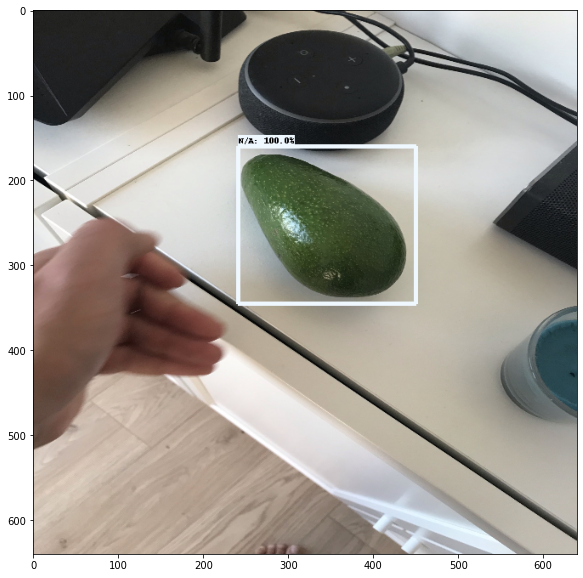

In [32]:
def inference_with_plot(path2images, box_th=0.25):
    for image_path in path2images:
        print('Running inference for {}... '.format(image_path), end='')
                
        detection_result, image_tensor = detect_image_simple(interpreter, image_path)
#         detection_result, image_tensor = detect_image_preprocess_original(interpreter, image_path)
#         print(detection_result)
        num_detections = len(detection_result)
        if isinstance(detection_result, list):
            classes = [int(det['class_id']) for det in detection_result]
        else:
            classes = int(det['class_id'])
        boxes = np.array([det['bounding_box'] for det in detection_result])
#         print(boxes)
        scores = [det['score'] for det in detection_result]

        label_id_offset = 1
        image_np_with_detections = image_tensor.copy()
        

        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                boxes,
                classes,
                scores,
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=box_th,
                agnostic_mode=False,
                line_thickness=5)

        plt.figure(figsize=(15,10))
        plt.imshow(image_np_with_detections)
        print('Done')
    plt.show()

det = inference_with_plot(test_image_list[:1])

# Viz

Running inference for images/test_images/IMG_1167.JPEG... Done
Running inference for images/test_images/IMG_1165.JPEG... Done
Running inference for images/test_images/IMG_1137.JPEG... Done
Running inference for images/test_images/IMG_1224.JPEG... Done
Running inference for images/test_images/IMG_1210.JPEG... Done
Running inference for images/test_images/IMG_1150.JPEG... Done
Running inference for images/test_images/IMG_1182.JPEG... Done
Running inference for images/test_images/IMG_1088.JPEG... Done
Running inference for images/test_images/IMG_1223.JPEG... Done
Running inference for images/test_images/IMG_1130.JPEG... Done
Running inference for images/test_images/IMG_1114.JPEG... Done
Running inference for images/test_images/IMG_1220.JPEG... Done
Running inference for images/test_images/IMG_1085.JPEG... Done
Running inference for images/test_images/IMG_1161.JPEG... Done
Running inference for images/test_images/IMG_1132.JPEG... Done
Running inference for images/test_images/IMG_1206.JPEG.

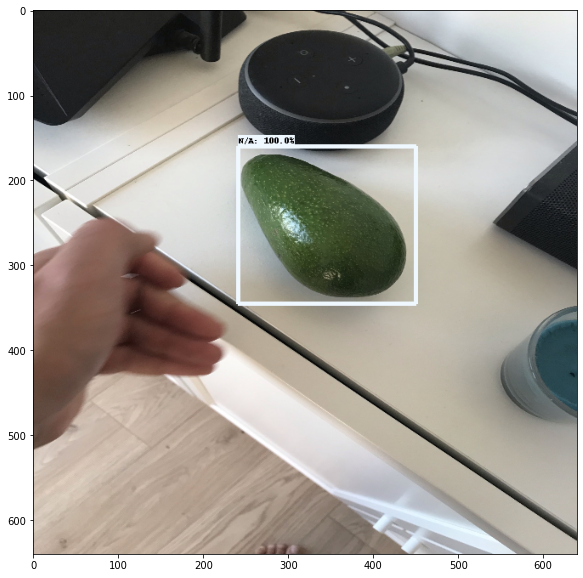

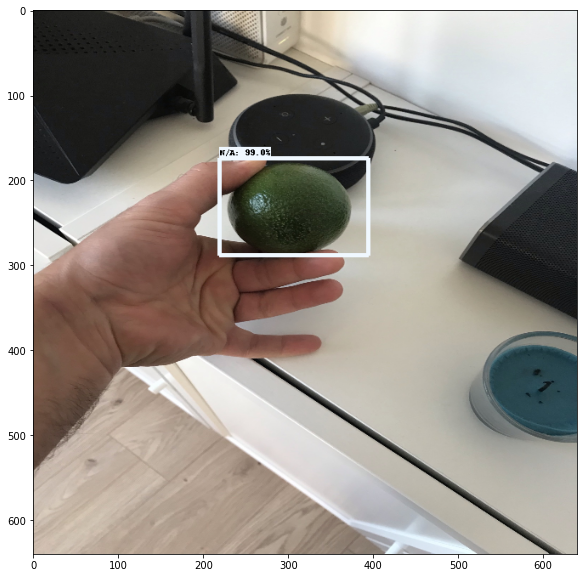

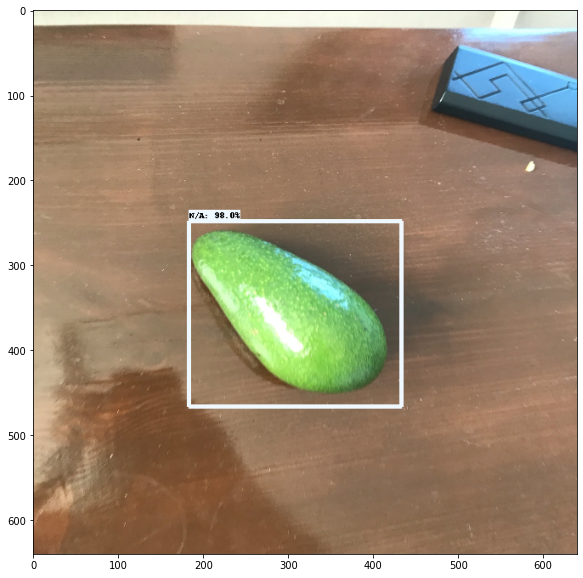

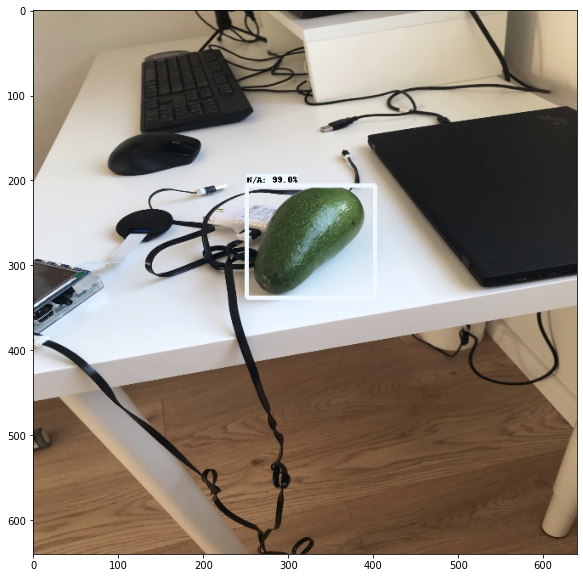

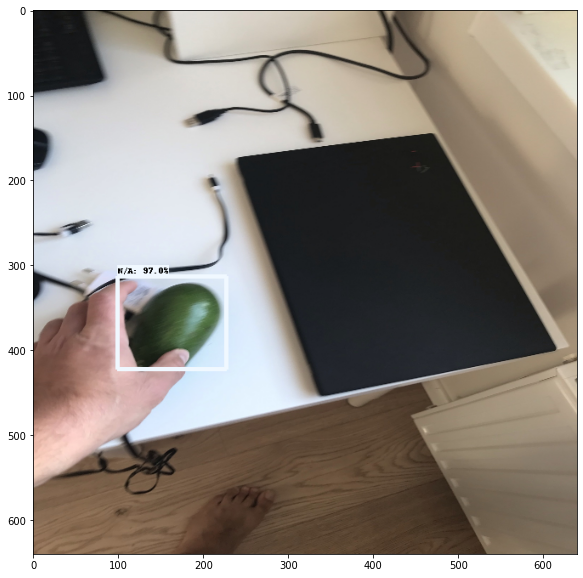

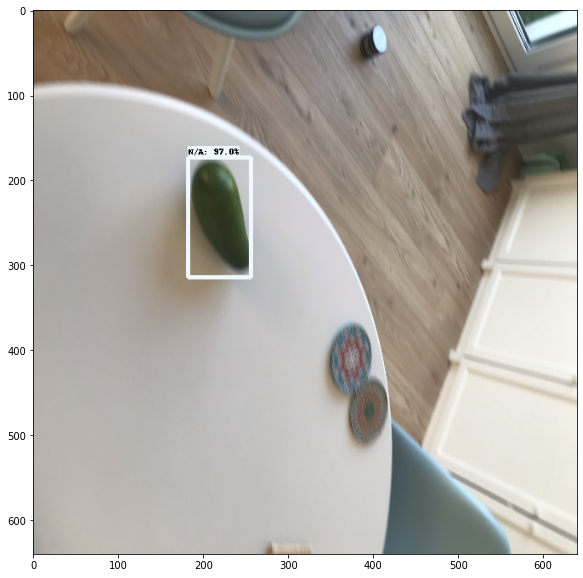

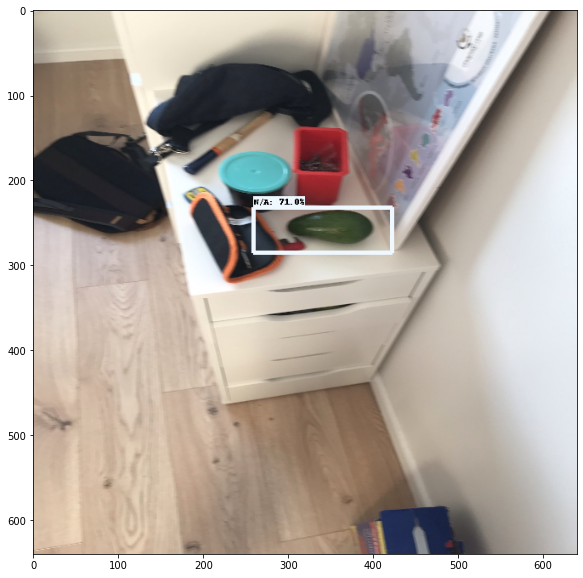

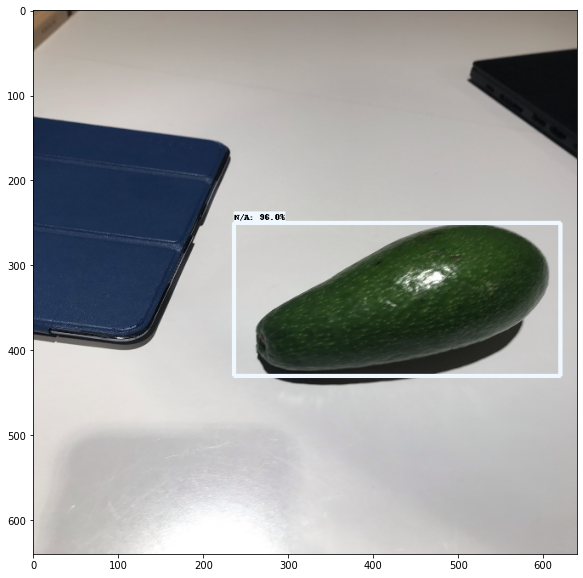

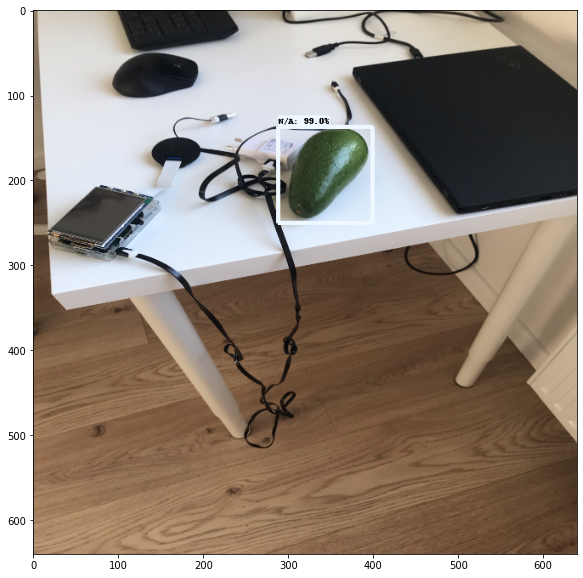

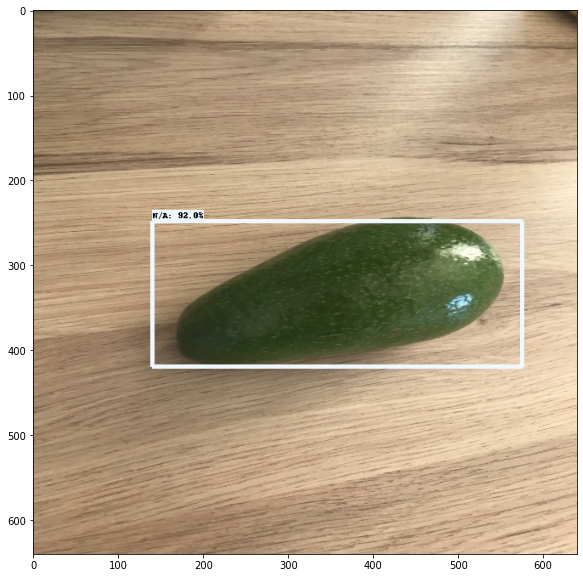

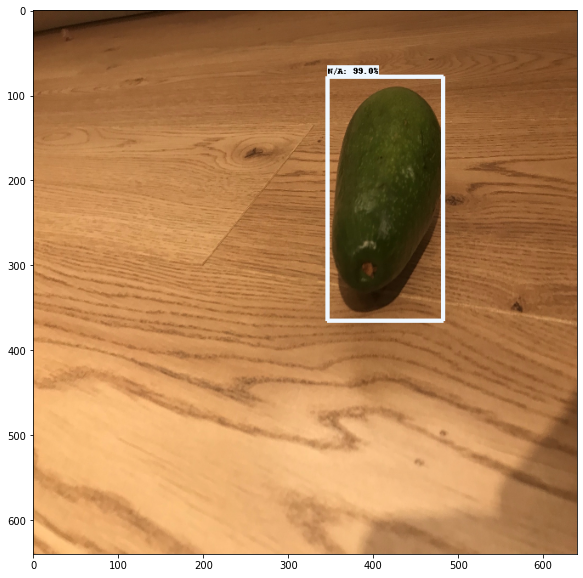

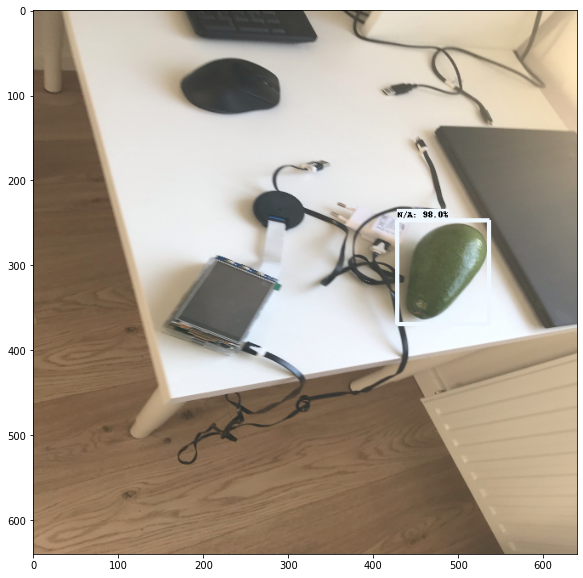

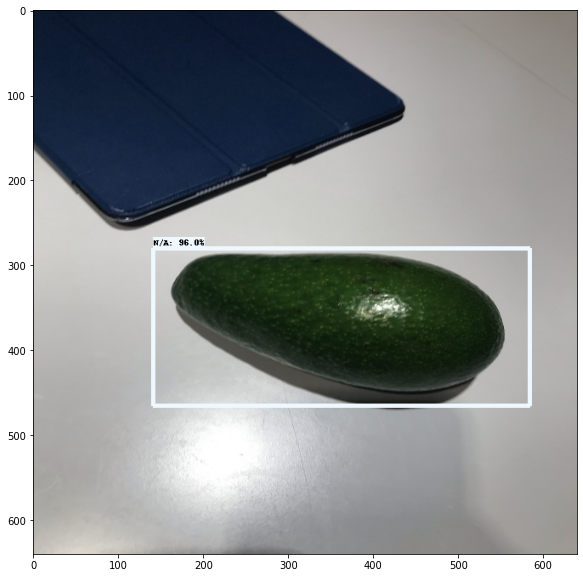

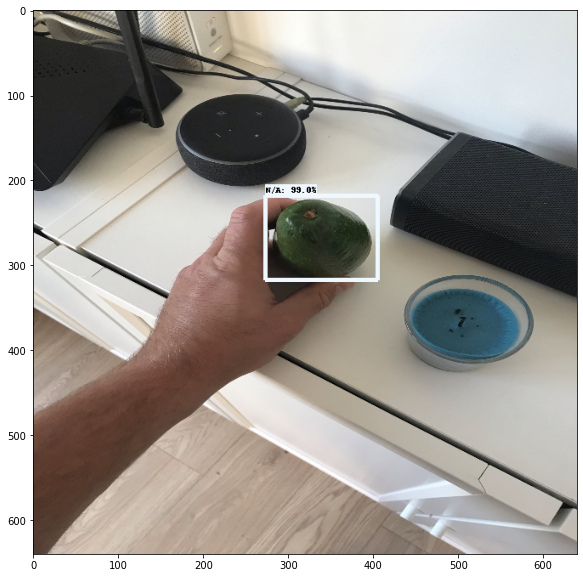

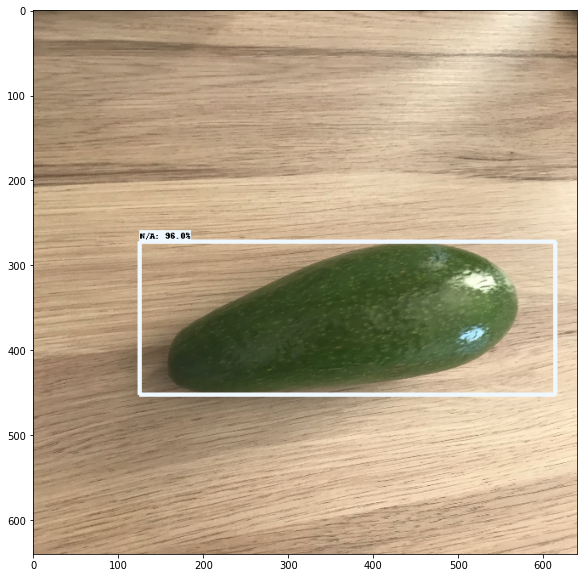

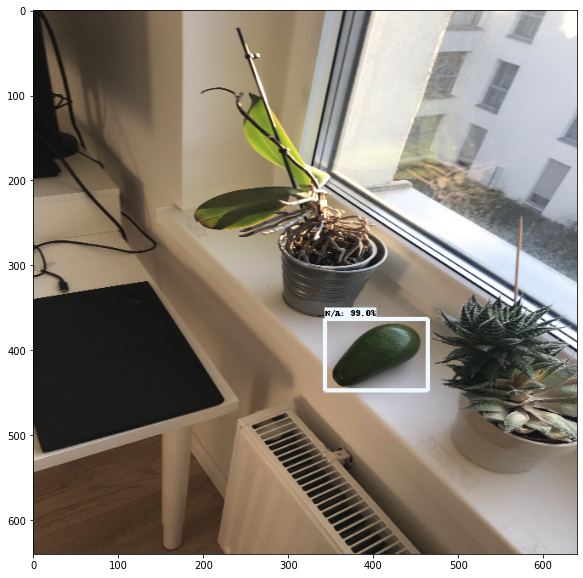

In [33]:
inference_with_plot(test_image_list[:])